## 1. EDA

In [2]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [4]:
data_path = "reddit_multilabel.csv"

In [5]:
data_raw = pd.read_csv(data_path)
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data_raw.shape

(1891, 50)

In [6]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 1891
Number of columns in data = 50




**Sample data:**

,id,Text,AcademicExperience,Advanced,Algorithms,Beginner,CSAW,CareerOriented,CertificationExperience,CompetitionInfo,...,Positive,Professional,ProfessionalInField,Programming,SQLInjection,Software,SucceedInCompetition,TrainingTools,Web,WorkingExperience
0,0,"""",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,""" Ethical hacking means hacking done with a ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,""" Hey guys! I'd like to have some recommenda...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,""" This is a story about how this spring seme...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,""" I am a Cybersecurity Student studying at we...",0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### 1.1. Checking for missing values

In [7]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id                          0
Text                        0
AcademicExperience          0
Advanced                    0
Algorithms                  0
Beginner                    0
CSAW                        0
CareerOriented              0
CertificationExperience     0
CompetitionInfo             0
Cryptography                0
DEFCON                      0
DomainKnowledge             0
FieldInterest               0
ForCareer                   0
ForCertification            0
ForCompetitionExperience    0
ForCourses                  0
ForDegree                   0
ForFeedback                 0
ForField                    0
ForSchoolChoice             0
ForSkillInfo                0
ForStudy                    0
GeneralAdvice               0
GeneralCTF                  0
HackingGeneral              0
Hardware                    0
InformationFromPeer         0
Legality                    0
Mentorship                  0
Mobile                      0
NCCDC                       0
NCL       

### 1.2. Calculating number of comments under each label

In [8]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of cases = ",len(data_raw))
print("Number of clean cases = ",clean_comments_count)
print("Number of cases with labels =",(len(data_raw)-clean_comments_count))

Total number of cases =  1891
Number of clean cases =  0
Number of cases with labels = 1891


In [9]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)
len(categories)

['AcademicExperience', 'Advanced', 'Algorithms', 'Beginner', 'CSAW', 'CareerOriented', 'CertificationExperience', 'CompetitionInfo', 'Cryptography', 'DEFCON', 'DomainKnowledge', 'FieldInterest', 'ForCareer', 'ForCertification', 'ForCompetitionExperience', 'ForCourses', 'ForDegree', 'ForFeedback', 'ForField', 'ForSchoolChoice', 'ForSkillInfo', 'ForStudy', 'GeneralAdvice', 'GeneralCTF', 'HackingGeneral', 'Hardware', 'InformationFromPeer', 'Legality', 'Mentorship', 'Mobile', 'NCCDC', 'NCL', 'Negative', 'Network/Wireless', 'Neutral', 'OperatingSystem', 'Password Cracking', 'Penetration Testing', 'Positive', 'Professional', 'ProfessionalInField', 'Programming', 'SQLInjection', 'Software', 'SucceedInCompetition', 'TrainingTools', 'Web', 'WorkingExperience']


48

In [10]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of cases'])
df_stats

,category,number of cases
0,AcademicExperience,133
1,Advanced,41
2,Algorithms,1
3,Beginner,79
4,CSAW,14
5,CareerOriented,105
6,CertificationExperience,68
7,CompetitionInfo,10
8,Cryptography,6
9,DEFCON,29


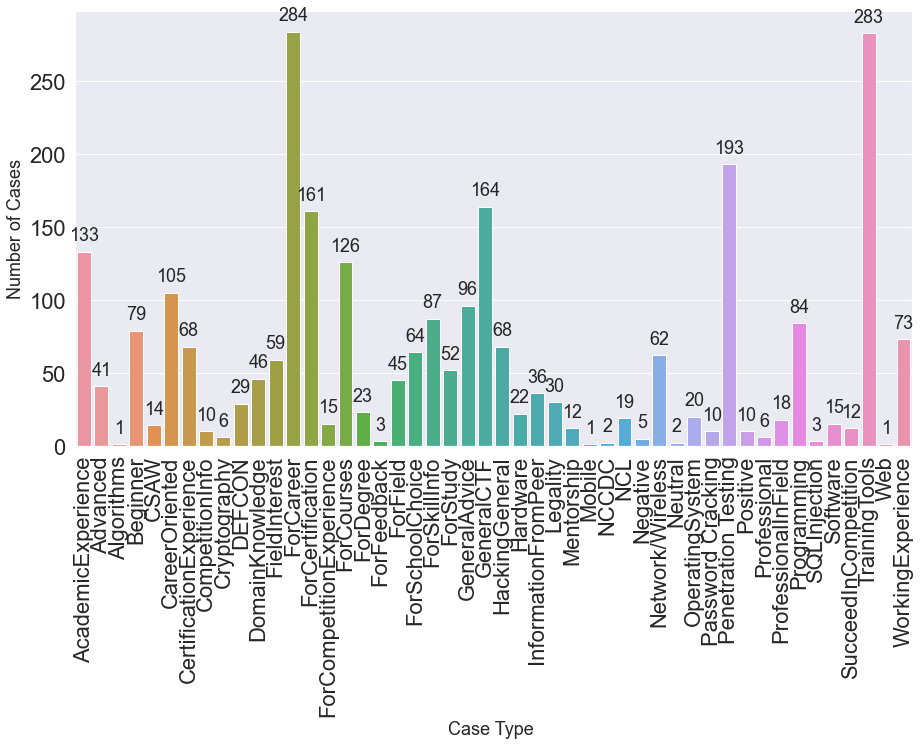

In [11]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

#plt.title("Cases in each category", fontsize=24)
plt.ylabel('Number of Cases', fontsize=18)
plt.xlabel('Case Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.xticks(rotation=90)

#plt.show()

plt.savefig('case_in_category.png')

### 1.3. Calculating number of comments having multiple labels

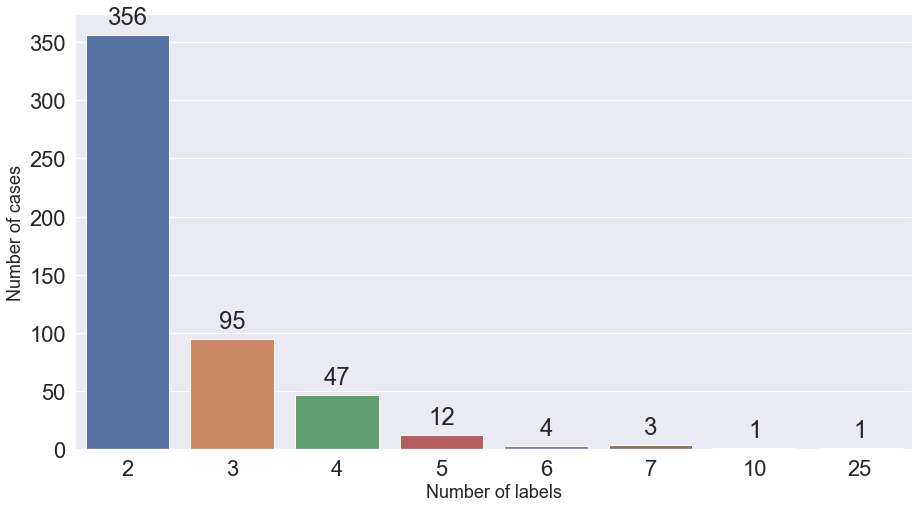

<Figure size 432x288 with 0 Axes>

In [35]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

#plt.title("Cases having multiple labels ")
plt.ylabel('Number of cases', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

plt.savefig('lable_number_distro.png')

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# AskForAdvice
subset = data_raw[data_raw.AskForAdvice==1]
text = subset.Text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("AskForAdvice",fontsize=40)
plt.imshow(cloud_toxic)


# SeekForResources
subset = data_raw[data_raw.SeekForResources==1]
text = subset.Text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("SeekForResources",fontsize=40)
plt.imshow(cloud_toxic)


### 1.4. WordCloud representation of most used words in each category of comments

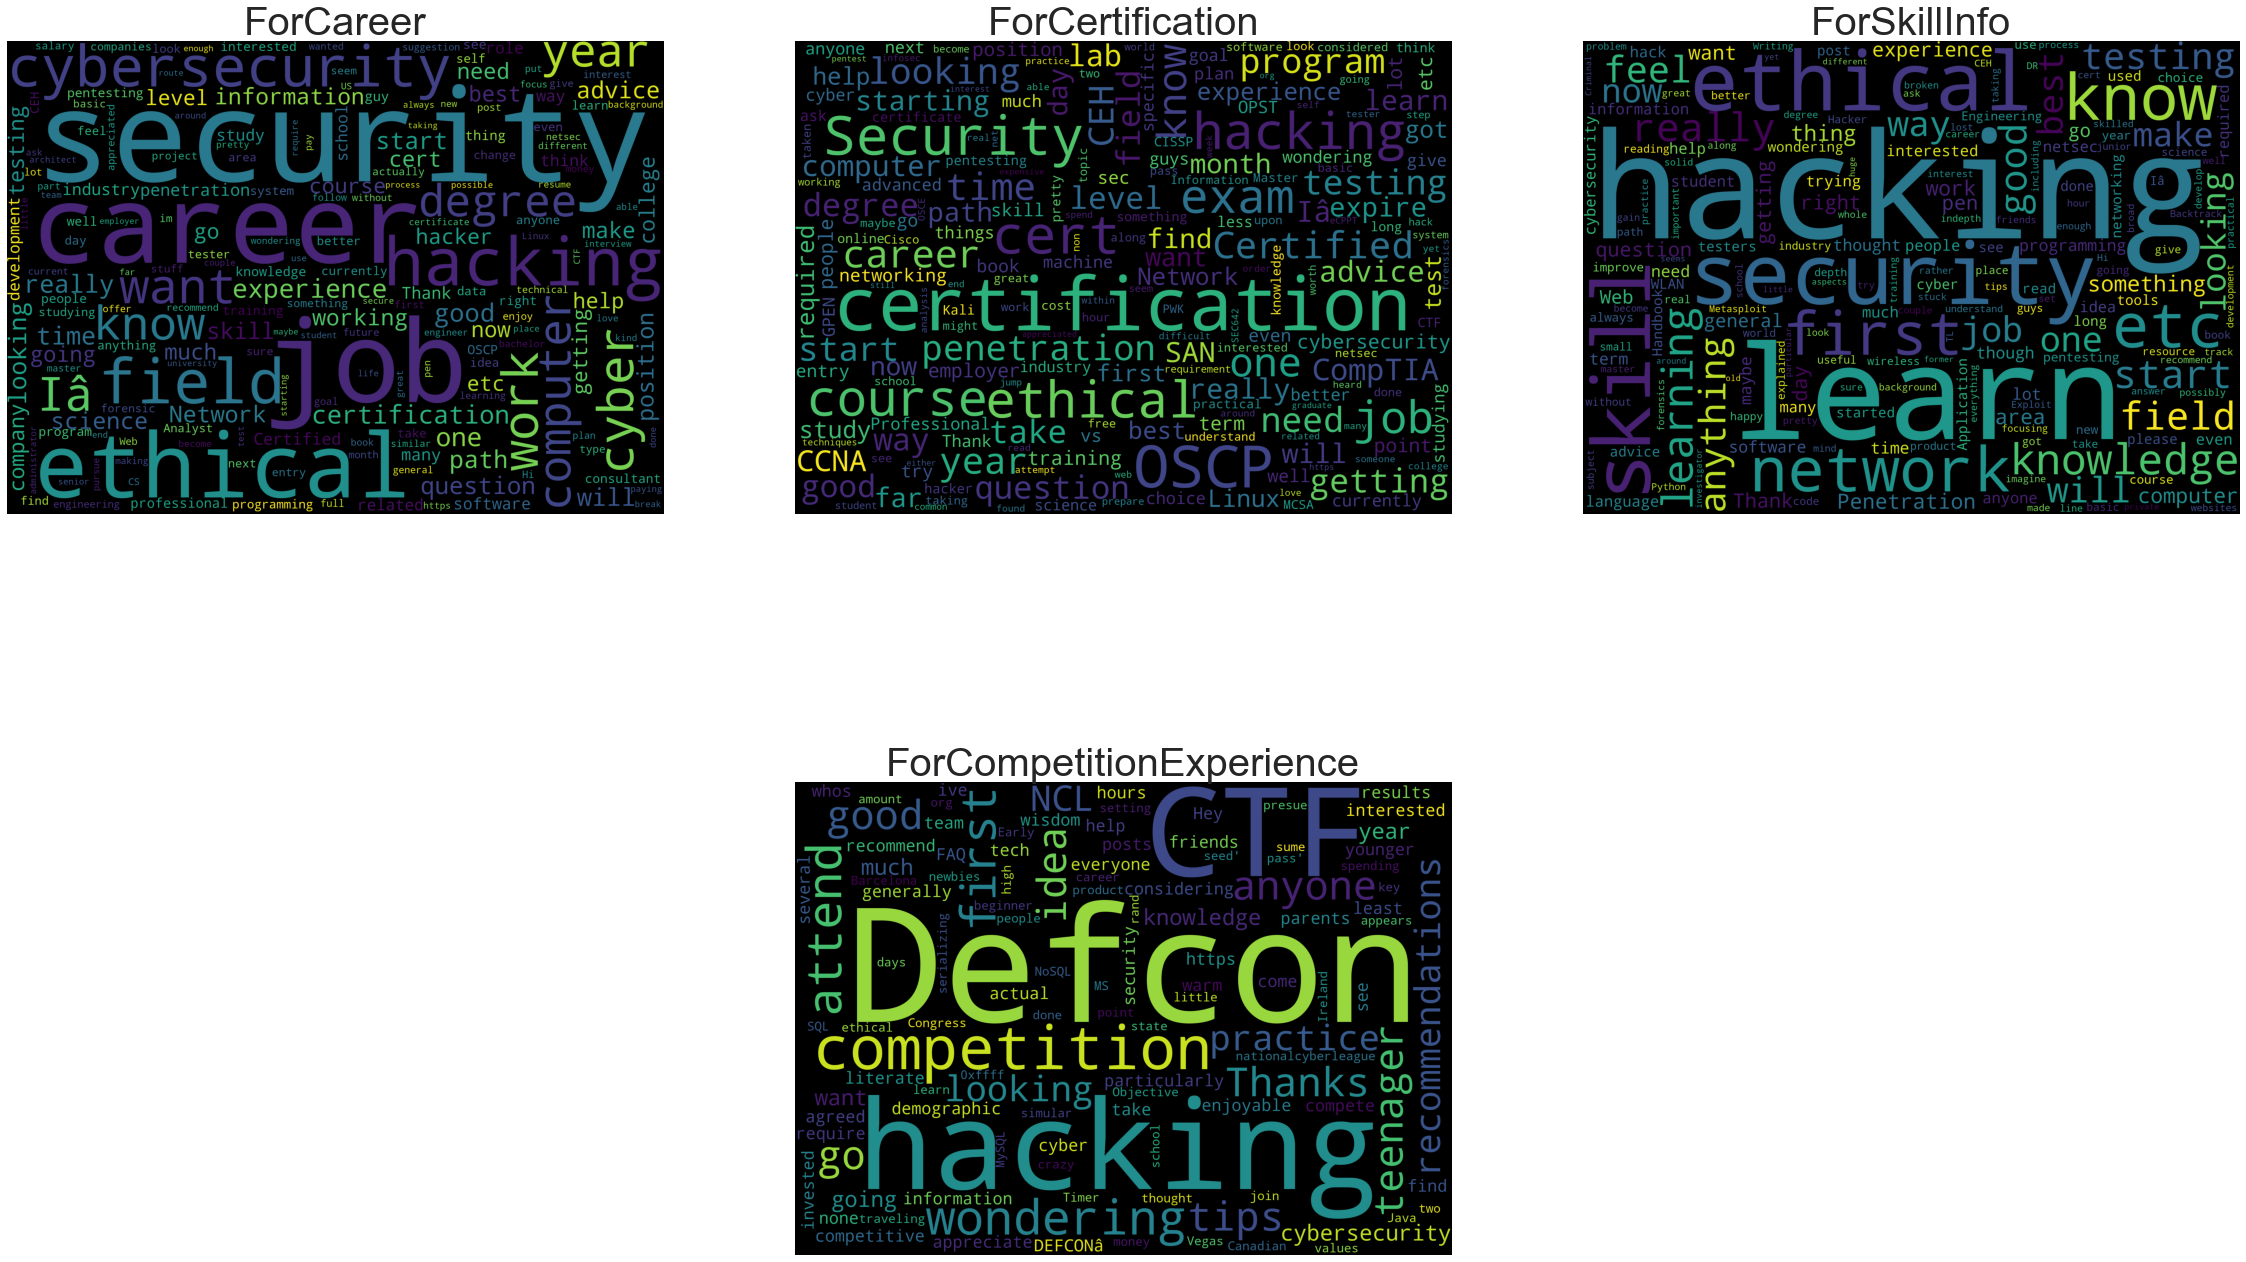

In [34]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# ForCareer
subset = data_raw[data_raw.ForCareer==1]
text = subset.Text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("ForCareer",fontsize=40)
plt.imshow(cloud_toxic)


# ForCertification
subset = data_raw[data_raw.ForCertification==1]
text = subset.Text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("ForCertification",fontsize=40)
plt.imshow(cloud_severe_toxic)


# ForCourses
subset = data_raw[data_raw.ForCourses==1]
text = subset.Text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("ForCourses",fontsize=40)
plt.imshow(cloud_obscene)




# ForSkillInfo
subset = data_raw[data_raw.ForSkillInfo==1]
text = subset.Text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("ForSkillInfo",fontsize=40)
plt.imshow(cloud_obscene)








# 'ForStudyAdvice'
subset = data_raw[data_raw.ForStudy==1]
text = subset.Text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("ForStudy",fontsize=40)
plt.imshow(cloud_obscene)




# 'ForGeneralAdvice'
subset = data_raw[data_raw.GeneralAdvice==1]
text = subset.Text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("ForGeneralAdvice",fontsize=40)
plt.imshow(cloud_obscene)



# 'ForSchoolChoice'
subset = data_raw[data_raw.ForSchoolChoice==1]
text = subset.Text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("ForSchoolChoice",fontsize=40)
plt.imshow(cloud_obscene)



# 'ForSchoolChoice'
subset = data_raw[data_raw.ForSchoolChoice==1]
text = subset.Text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("ForSchoolChoice",fontsize=40)
plt.imshow(cloud_obscene)



# 'ForSchoolChoice'
subset = data_raw[data_raw.ForCompetitionExperience==1]
text = subset.Text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("ForCompetitionExperience",fontsize=40)
plt.imshow(cloud_obscene)



plt.show()

## 2. Data Pre-Processing

In [14]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 50)

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### 2.1. Cleaning Data

In [16]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [17]:
data['Text'] = data['Text'].str.lower()
data['Text'] = data['Text'].apply(cleanHtml)
data['Text'] = data['Text'].apply(cleanPunc)
data['Text'] = data['Text'].apply(keepAlpha)
data.head()

,id,Text,AcademicExperience,Advanced,Algorithms,Beginner,CSAW,CareerOriented,CertificationExperience,CompetitionInfo,...,Positive,Professional,ProfessionalInField,Programming,SQLInjection,Software,SucceedInCompetition,TrainingTools,Web,WorkingExperience
992,992,i got scared when i was getting ghosted while ...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
572,572,anyone knows how to start,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1327,1327,looking for some career advice,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1179,1179,im just a normal it support guy looking for a ...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
768,768,ethical hacking,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.2. Removing Stop Words

In [18]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['Text'] = data['Text'].apply(removeStopWords)
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/czhong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,Text,AcademicExperience,Advanced,Algorithms,Beginner,CSAW,CareerOriented,CertificationExperience,CompetitionInfo,...,Positive,Professional,ProfessionalInField,Programming,SQLInjection,Software,SucceedInCompetition,TrainingTools,Web,WorkingExperience
992,992,got scared getting ghosted seemingly less...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
572,572,anyone knows start,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1327,1327,looking career advice,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1179,1179,im normal support guy looking security en...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
768,768,ethical hacking,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.3. Stemming

In [19]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['Text'] = data['Text'].apply(stemming)
data.head()

,id,Text,AcademicExperience,Advanced,Algorithms,Beginner,CSAW,CareerOriented,CertificationExperience,CompetitionInfo,...,Positive,Professional,ProfessionalInField,Programming,SQLInjection,Software,SucceedInCompetition,TrainingTools,Web,WorkingExperience
992,992,got scare get ghost seem less qualifi peer lan...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
572,572,anyon know start,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1327,1327,look career advic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1179,1179,im normal support guy look secur engin job im ...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
768,768,ethic hack,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.4. Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.01, shuffle=True)

print(train.shape)
print(test.shape)

#train_text = train['Text']
#test_text = test['Text']

(1980, 50)
(20, 50)


In [21]:
train_text = train['Text']
test_text = test['Text']

### 2.5. TF-IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)
#print(vectorizer)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [23]:
x_train = vectorizer.transform(train_text)
#x_train = vectorizer.fit_transform(train_text)
#print(x_train)
y_train = train.drop(labels = ['id','Text'], axis=1)
#print(y_train)

x_test = vectorizer.transform(test_text)
#x_test = vectorizer.fit_transform(test_text)
#print(x_test)
y_test = test.drop(labels = ['id','Text'], axis=1)

In [24]:
#print(train_text)
#print(x_train)
x_test.shape
x_train.shape

(1980, 967)